In [12]:
import math
def convert_to_float(s) -> float:
    if not isinstance(s, str):
        return math.nan  # Return NaN for non-string input
    
    parts = s.split('.')
    if len(parts) > 2:
        s = parts[0] + '.' + ''.join(parts[1:])  # Fix multiple dots
    
    try:
        return float(s)
    except ValueError:
        return math.nan  # Return NaN for invalid float conversion

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv("data/Food_Time new.csv")  # Change to your actual dataset
import numpy as np

# Drop unnecessary columns
df_clean = df.drop(columns=["ID", "Delivery_person_ID"])

# Fix missing values
df_clean["Traffic_Level"].fillna(df_clean["Traffic_Level"].mode()[0], inplace=True)
df_clean["weather_description"].fillna(df_clean["weather_description"].mode()[0], inplace=True)
df_clean["temperature"].fillna(df_clean["temperature"].median(), inplace=True)
df_clean["humidity"].fillna(df_clean["humidity"].median(), inplace=True)
df_clean["precipitation"].fillna(df_clean["precipitation"].median(), inplace=True)
df_clean["Distance (km)"].fillna(df_clean["Distance (km)"].median(), inplace=True)
#df_clean["TARGET"].fillna(df_clean["TARGET"].median(), inplace=True)

# Convert latitude/longitude columns to proper float values
lat_lon_cols = ["Restaurant_latitude", "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude"]
for col in lat_lon_cols:
  df_clean[col] = df_clean[col].astype(str).str.replace(".", "", regex=False).astype(float) / 10**6  # Adjusting decimal placement

# Fix `TARGET` column formatting
# Fix incorrect number formatting:
df_clean["TARGET"] = df_clean["TARGET"].astype(str).str.replace(r"[^\d.]", "", regex=True)  # Remove non-numeric characters
df_clean["TARGET"] = df_clean["TARGET"].str.replace(r"(\d+)\.(\d+)\.(\d+)", r"\1\2.\3", regex=True)  # Fix misplaced dots
df_clean["TARGET"] = pd.to_numeric(df_clean["TARGET"], errors="coerce")  # Convert to float

# Encode categorical variables
df_clean = pd.get_dummies(df_clean, drop_first=True)

# Remove duplicates
df_clean.drop_duplicates(inplace=True)

# Standardize numerical features
num_cols = df_clean.select_dtypes(include=["number"]).columns
df_clean[num_cols] = (df_clean[num_cols] - df_clean[num_cols].mean()) / df_clean[num_cols].std()

# Final check
df_clean.info(), df_clean.head()

# Fix incorrect number formatting in TARGET column
df_clean["TARGET"] = df_clean["TARGET"].astype(str).str.replace(r"[^\d.]", "", regex=True)

# Convert to float
df_clean["TARGET"] = pd.to_numeric(df_clean["TARGET"], errors="coerce")

# Retry filling missing values with median
df_clean["TARGET"].fillna(df_clean["TARGET"].median(), inplace=True)

# Verify the changes
df_clean["TARGET"].head()

from sklearn.preprocessing import StandardScaler

# Convert latitude/longitude columns to proper float values
for col in lat_lon_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

# Encode categorical variables using one-hot encoding
df_clean = pd.get_dummies(df_clean, drop_first=True)

# Remove duplicates
df_clean.drop_duplicates(inplace=True)

# Standardize numerical features
scaler = StandardScaler()
num_cols = df_clean.select_dtypes(include=["number"]).columns
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

<class 'pandas.core.frame.DataFrame'>
Index: 9991 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Delivery_person_Age                   9991 non-null   float64
 1   Delivery_person_Ratings               9991 non-null   float64
 2   Restaurant_latitude                   9991 non-null   float64
 3   Restaurant_longitude                  9991 non-null   float64
 4   Delivery_location_latitude            9991 non-null   float64
 5   Delivery_location_longitude           9991 non-null   float64
 6   temperature                           9991 non-null   float64
 7   humidity                              9991 non-null   float64
 8   precipitation                         9991 non-null   float64
 9   Distance (km)                         9991 non-null   float64
 10  TARGET                                3001 non-null   float64
 11  Traffic_Level_Low     

In [73]:
import numpy as np

# Create a copy for augmentation
df_aug = df_clean.copy()

# --- 1. Augment Numerical Features ---
num_cols = df_clean.select_dtypes(include=["number"]).columns

# Apply small Gaussian noise (5% variation)
noise = np.random.normal(loc=0, scale=0.05, size=df_aug[num_cols].shape)
df_aug[num_cols] += noise

# Apply small random scaling (±5% variation)
scaling_factor = np.random.uniform(0.95, 1.05, size=df_aug[num_cols].shape)
df_aug[num_cols] *= scaling_factor

# --- 2. Augment Categorical Features ---
cat_cols = df_clean.select_dtypes(include=["object", "category"]).columns

# Duplicate rare categories with slight modifications
for col in cat_cols:
    rare_values = df_clean[col].value_counts()[df_clean[col].value_counts() < 10].index  # Rare categories
    rare_samples = df_clean[df_clean[col].isin(rare_values)]
    if not rare_samples.empty:
        df_aug = pd.concat([df_aug, rare_samples], axis=0)

# Shuffle dataset after augmentation
df_aug = df_aug.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new augmented dataset size
df_clean.shape, df_aug.shape


((9991, 31), (9991, 31))

In [74]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9991 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Delivery_person_Age                   9991 non-null   float64
 1   Delivery_person_Ratings               9991 non-null   float64
 2   Restaurant_latitude                   9991 non-null   float64
 3   Restaurant_longitude                  9991 non-null   float64
 4   Delivery_location_latitude            9991 non-null   float64
 5   Delivery_location_longitude           9991 non-null   float64
 6   temperature                           9991 non-null   float64
 7   humidity                              9991 non-null   float64
 8   precipitation                         9991 non-null   float64
 9   Distance (km)                         9991 non-null   float64
 10  TARGET                                9991 non-null   float64
 11  Traffic_Level_Low     

In [201]:
from sklearn.model_selection import train_test_split

X = df_aug.drop(['TARGET'], axis=1)
y = df_aug['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [76]:
from sklearn import svm

clf = svm.SVR(kernel='linear', C=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.049161642585441756

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [116]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print(f"R2: {r2}")

R2: 0.8220561345809421


In [279]:
df_aug.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'temperature', 'humidity',
       'precipitation', 'Distance (km)', 'TARGET', 'Traffic_Level_Low',
       'Traffic_Level_Moderate', 'Traffic_Level_Very High',
       'Traffic_Level_Very Low', 'weather_description_clear sky',
       'weather_description_few clouds', 'weather_description_fog',
       'weather_description_haze', 'weather_description_light rain',
       'weather_description_mist', 'weather_description_moderate rain',
       'weather_description_overcast clouds',
       'weather_description_scattered clouds', 'weather_description_smoke',
       'Type_of_order_Drinks', 'Type_of_order_Meal', 'Type_of_order_Snack',
       'Type_of_vehicle_electric_scooter', 'Type_of_vehicle_motorcycle',
       'Type_of_vehicle_scooter'],
      dtype='object')

In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures

preprocessor = None

In [299]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer
from sklearn.ensemble import GradientBoostingRegressor

boost_model = GradientBoostingRegressor(
)

preprocessor = ColumnTransformer([
  ("num", StandardScaler(), num_cols),
  ("cat", QuantileTransformer(n_quantiles=100), cat_cols),
  ("poly", PolynomialFeatures(degree=3, include_bias=False), [
    'Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'temperature', 'humidity',
       'precipitation', 'Distance (km)', 'Traffic_Level_Low',
       'Traffic_Level_Moderate', 'Traffic_Level_Very High',
       'Traffic_Level_Very Low', 'weather_description_clear sky',
       'weather_description_few clouds', 'weather_description_fog',
       'weather_description_haze', 'weather_description_light rain',
       'weather_description_mist', 'weather_description_moderate rain',
       'weather_description_overcast clouds',
       'weather_description_scattered clouds', 'weather_description_smoke',
       'Type_of_order_Drinks', 'Type_of_order_Meal', 'Type_of_order_Snack',
       'Type_of_vehicle_electric_scooter', 'Type_of_vehicle_motorcycle',
       'Type_of_vehicle_scooter'
  ])
]) 

pipe_preproc = Pipeline([
  ("preprocess", preprocessor),
  ("model", RandomForestRegressor(n_estimators=100, max_depth=5))
])

pipe = Pipeline([
  ("preprocess", pipe_preproc),
  ("model", LinearRegression())
])
pipe_linear = Pipeline([
  ("scale", StandardScaler()),
  ("model", LinearRegression())
])
pipe_elastic = Pipeline([
  ("scale", QuantileTransformer(n_quantiles=250)),
  ("model", ElasticNetCV())
])
pipe_rf = Pipeline([
  ("scale", QuantileTransformer(n_quantiles=200)),
  ("model", RandomForestRegressor(n_estimators=10, max_depth=10))
])

In [254]:
from sklearn.ensemble import StackingRegressor

estimators = [
  ('pipe_boost', pipe),
  ('pipe_linear', pipe_linear),
  ('pipe_elastic', pipe_elastic),
  ('pipe_rf', pipe_rf)
]

reg = StackingRegressor(
  estimators=estimators,
  final_estimator=LassoCV(),
  cv=10,
)
reg.fit(X_train, y_train)

StackingRegressor(cv=10,
                  estimators=[('pipe_boost',
                               Pipeline(steps=[('scale',
                                                QuantileTransformer(n_quantiles=150)),
                                               ('model',
                                                HistGradientBoostingRegressor(learning_rate=0.2,
                                                                              max_depth=5,
                                                                              max_iter=5,
                                                                              random_state=42,
                                                                              validation_fraction=0.2))])),
                              ('pipe_linear',
                               Pipeline(steps=[('scale', StandardScaler()),
                                               ('model', LinearRegression())])),
                              ('pipe_elastic',
                               Pipeline(steps=[('scale',
                                                QuantileTransformer(n_quantiles=250)),
                                               ('model', ElasticNetCV())])),
                              ('pipe_rf',
                               Pipeline(steps=[('scale',
                                                QuantileTransformer(n_quantiles=200)),
                                               ('model',
                                                RandomForestRegressor(max_depth=10,
                                                                      n_estimators=10))]))],
                  final_estimator=LassoCV())

In [188]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error

def print_metrics(y_test, y_pred) -> None:
  mae = mean_absolute_error(y_test, y_pred)
  mape = mean_absolute_percentage_error(y_test, y_pred)
  mse = np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)

  print(f"MAE: {mae}\nMAPE: {mape}\nMSE: {mse}\nR2: {r2}")

In [302]:
y_pred = pipe_rf.predict(X_test)
print_metrics(y_test, y_pred)

NotFittedError: This QuantileTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [276]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
tree_preds_gb = np.array([tree.predict(X_test) for tree in gb_model.estimators_[:, 0]]).T

y_pred_min_gb = tree_preds_gb.min(axis=1)
y_pred_max_gb = tree_preds_gb.max(axis=1)

c:\Users\Omen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Omen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Omen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Omen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Omen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  

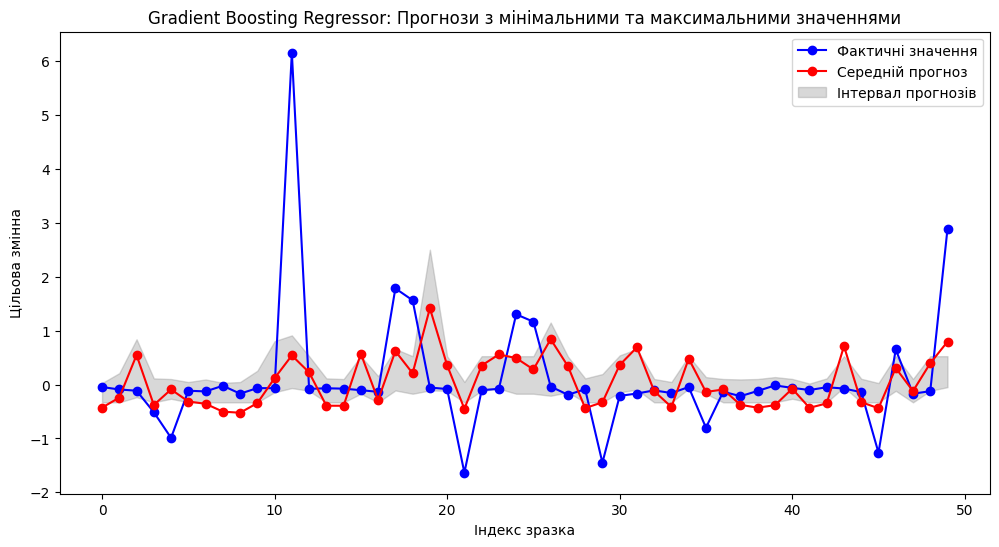

In [277]:
# ---------------------------------------------------------
# Візуалізація прогнозів із мінімальними та максимальними значеннями для перших 50 зразків
plt.figure(figsize=(12,6))
indices = np.arange(50)
plt.plot(indices, y_test.values[:50], 'bo-', label='Фактичні значення')
plt.plot(indices, y_pred[:50], 'ro-', label='Середній прогноз')
plt.fill_between(indices, y_pred_min_gb[:50], y_pred_max_gb[:50], color='gray', alpha=0.3, label='Інтервал прогнозів')
plt.xlabel('Індекс зразка')
plt.ylabel('Цільова змінна')
plt.title('Gradient Boosting Regressor: Прогнози з мінімальними та максимальними значеннями')
plt.legend()
plt.show()

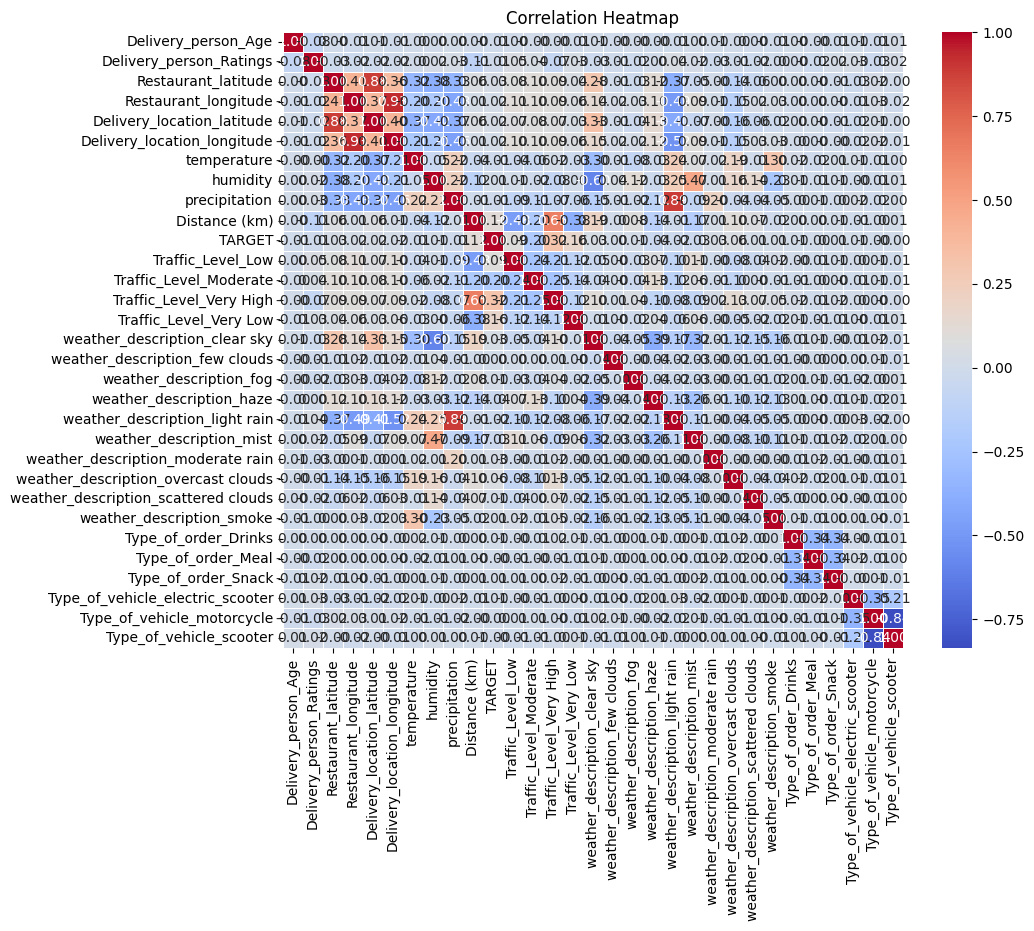

In [113]:
corr_matrix = df_aug.corr()
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show plot
plt.title("Correlation Heatmap")
plt.show()

In [119]:
df_aug.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'temperature', 'humidity',
       'precipitation', 'Distance (km)', 'TARGET', 'Traffic_Level_Low',
       'Traffic_Level_Moderate', 'Traffic_Level_Very High',
       'Traffic_Level_Very Low', 'weather_description_clear sky',
       'weather_description_few clouds', 'weather_description_fog',
       'weather_description_haze', 'weather_description_light rain',
       'weather_description_mist', 'weather_description_moderate rain',
       'weather_description_overcast clouds',
       'weather_description_scattered clouds', 'weather_description_smoke',
       'Type_of_order_Drinks', 'Type_of_order_Meal', 'Type_of_order_Snack',
       'Type_of_vehicle_electric_scooter', 'Type_of_vehicle_motorcycle',
       'Type_of_vehicle_scooter'],
      dtype='object')

In [148]:
col_map = {}
for col in df_aug.columns:
  X = df_aug.drop([col], axis=1)
  y = df_aug[col]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = ElasticNetCV()
  pipe = Pipeline([
    ("scale",  QuantileTransformer(n_quantiles=100)),
    ("model", model)
  ])
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  col_map[col] = r2

c:\Users\Omen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Omen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Omen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Omen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_mode

In [149]:
sorted([(col, r2) for col, r2 in col_map.items()], key=lambda x: x[1])

[('weather_description_moderate rain', 0.0),
 ('Delivery_person_Age', 0.012484839894938315),
 ('Delivery_person_Ratings', 0.021500126564126365),
 ('weather_description_few clouds', 0.04839032457371906),
 ('weather_description_fog', 0.08947009879358725),
 ('TARGET', 0.19500835499128277),
 ('Type_of_order_Drinks', 0.3107278060730586),
 ('Type_of_order_Meal', 0.317957580568362),
 ('Type_of_order_Snack', 0.3193228785636396),
 ('weather_description_overcast clouds', 0.3582747995838492),
 ('weather_description_scattered clouds', 0.37780132738606875),
 ('temperature', 0.42003430050803614),
 ('Traffic_Level_Very High', 0.4882603862866396),
 ('weather_description_smoke', 0.49395224965283735),
 ('Traffic_Level_Moderate', 0.5329133161211514),
 ('weather_description_light rain', 0.5684212345462686),
 ('Restaurant_longitude', 0.6113588602828959),
 ('Traffic_Level_Very Low', 0.6404784121851068),
 ('Delivery_location_longitude', 0.6696650699977751),
 ('weather_description_mist', 0.6913915991690789),


<Axes: >

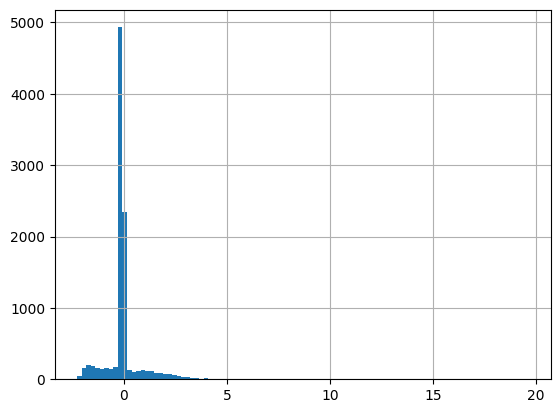

In [143]:
df_aug['TARGET'].hist(bins=100)

In [144]:
df_aug['TARGET'].describe()

count    9991.000000
mean       -0.000025
std         1.002441
min        -2.261757
25%        -0.150249
50%        -0.097918
75%        -0.044453
max        19.622821
Name: TARGET, dtype: float64